# An Unsupervised Learning Approach to Football Coaching
## A. Types of players
## By Catalin Vasii

In [39]:
import numpy as np
import pandas as pd
from __future__ import division
from IPython.display import YouTubeVideo
import matplotlib.pyplot as plt
%matplotlib inline

### Nobody can deny that there are several types of players in the game of football. Some say there are two types: germans and greeks

In [40]:
YouTubeVideo('https://www.youtube.com/watch?v=ur5fGSBsfq8')

### While other people say there are defenders, midfielders and attackers (excepting the goalkeepers who are standing most of the time).  These other people are called football coaches. People that we aim to replace with machine learning and data science. 

### We were able to develop an AI system that beated humans at the game of GO, but is football more complex and hard to beat? This notebook is a small step in answering this question.

## 1. Getting and pre-processing the data

![](euro2016.jpg)

We got __UEFA EURO 2016__ data from the [UEFA website](http://www.uefa.com/uefaeuro/season=2016/statistics/index.html)
To download speciffic datapoints we have simply done:

```python
url_g = r'http://www.uefa.com/uefaeuro/season=2016/statistics/round=2000448/players/\
category=attacking/kind=goals/index.html'
tabele = pd.read_html(url_g)
dfGoals = tabele[0]
```

more details in the speciffic noteboon in my [Football repo](https://github.com/cvasii23/Football)
A csv file with various datapoints was created:

In [41]:
df = pd.read_csv('jucatori.csv')

In [42]:
df.head()

,Name,Goals,Assists,Minutes,Solo runs into attacking third,Solo runs into key area,Solo runs into penalty area,Deliveries into attacking third,Deliveries into a key area,Deliveries into penalty area,Total attempts,On target,Red cards,Yellow cards,Fouls committed,Tackles,Blocks
0,Antoine Griezmann,6,2,555,11,11,5,21,17,11,26,14,0,0,4,5,1
1,Cristiano Ronaldo,3,3,625,18,11,4,20,14,5,46,12,0,1,8,0,0
2,Olivier Giroud,3,2,456,3,0,3,8,6,2,15,6,0,1,6,0,0
3,Dimitri Payet,3,2,506,22,17,12,32,24,32,20,7,0,0,2,1,0
4,Gareth Bale,3,1,533,27,21,6,21,11,8,25,16,0,1,5,3,1


In [43]:
df.drop(['Solo runs into attacking third','Solo runs into key area',
'Deliveries into attacking third','Deliveries into a key area'],axis=1,inplace=True)

### After dropping some datapoints that we decided are not so relevant for this exercise, we don't want the number of goals, attacks, tackles and fouls, but a density of them, per minute of football played, for each player

In [44]:
df.set_index('Name',inplace=True)

We made the copy just to have the initial one as it is

In [45]:
df1 = df.copy()

In [46]:
coloane = df1.columns.tolist()
coloane.remove('Minutes')

In [47]:
for col in coloane:
    df1[col] = df1[col] / df1['Minutes']

df1.drop('Minutes',axis=1,inplace=True)

In [48]:
df1.head()

,Goals,Assists,Solo runs into penalty area,Deliveries into penalty area,Total attempts,On target,Red cards,Yellow cards,Fouls committed,Tackles,Blocks
Name,,,,,,,,,,,
Antoine Griezmann,0.010811,0.003604,0.009009,0.019820,0.046847,0.025225,0.0,0.000000,0.007207,0.009009,0.001802
Cristiano Ronaldo,0.004800,0.004800,0.006400,0.008000,0.073600,0.019200,0.0,0.001600,0.012800,0.000000,0.000000
Olivier Giroud,0.006579,0.004386,0.006579,0.004386,0.032895,0.013158,0.0,0.002193,0.013158,0.000000,0.000000
Dimitri Payet,0.005929,0.003953,0.023715,0.063241,0.039526,0.013834,0.0,0.000000,0.003953,0.001976,0.000000
Gareth Bale,0.005629,0.001876,0.011257,0.015009,0.046904,0.030019,0.0,0.001876,0.009381,0.005629,0.001876


### Moreover, since not all the datapoints are on the same scale, we want to standardize. Easiest way: use scikit-learn

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances

In [50]:

normalizer = StandardScaler(copy=False)
normalizer.fit_transform(df1)

array([[  4.33454227e+00,   1.34919285e+00,   8.29062366e-01, ...,
         -6.52384087e-01,   1.15872964e+00,  -3.33226871e-01],
       [  1.69263292e+00,   1.92376516e+00,   4.14590517e-01, ...,
         -1.95612374e-01,  -6.88291331e-01,  -6.78727860e-01],
       [  2.47452705e+00,   1.72492379e+00,   4.43018416e-01, ...,
         -1.66382578e-01,  -6.88291331e-01,  -6.78727860e-01],
       ..., 
       [ -4.17093249e-01,  -3.81446641e-01,  -6.02124959e-01, ...,
         -7.22458294e-01,  -3.74363221e-02,   1.45186157e+00],
       [ -4.17093249e-01,  -3.81446641e-01,  -6.02124959e-01, ...,
         -7.32150801e-01,  -4.96018363e-02,   1.11335671e+00],
       [ -4.17093249e-01,  -3.81446641e-01,  -3.61425273e-01, ...,
         -3.56063145e-03,  -3.77655986e-01,  -9.76580155e-02]])

In [51]:
df1.head()

,Goals,Assists,Solo runs into penalty area,Deliveries into penalty area,Total attempts,On target,Red cards,Yellow cards,Fouls committed,Tackles,Blocks
Name,,,,,,,,,,,
Antoine Griezmann,4.334542,1.349193,0.829062,0.907426,2.235545,3.320213,-0.075378,-0.645252,-0.652384,1.158730,-0.333227
Cristiano Ronaldo,1.692633,1.923765,0.414591,-0.158653,4.078032,2.359938,-0.075378,-0.222420,-0.195612,-0.688291,-0.678728
Olivier Giroud,2.474527,1.724924,0.443018,-0.484618,1.274664,1.396974,-0.075378,-0.065713,-0.166383,-0.688291,-0.678728
Dimitri Payet,2.188794,1.516784,3.165348,4.823774,1.731337,1.504727,-0.075378,-0.645252,-0.918195,-0.283115,-0.678728
Gareth Bale,2.056788,0.519590,1.186188,0.473552,2.239502,4.084186,-0.075378,-0.149436,-0.474858,0.465664,-0.318966


## 2. The quest for the best distance

### We would like to choose the best distance to use for our clustering. So we took the most popular: $L_1$, $L_2$ and cosine similarity.

In [52]:
dataL2 = pairwise_distances(df1, metric='l2')

dataL1 = pairwise_distances(df1, metric='l1')

dataCosine = pairwise_distances(df1, metric='cosine')

### For each, we want to plot a histogram with all the paiwise distances. Te above procedure has constructed symmetric distance matirces, but since we want for our histogram, to count only once each distance, there is the following trick to extract the upper triangle in a single vector:

In [53]:
A = np.array([[1,2,3],[1,2,3],[1,2,3]])

A[np.triu_indices_from(A,k=1)]

array([2, 3, 3])

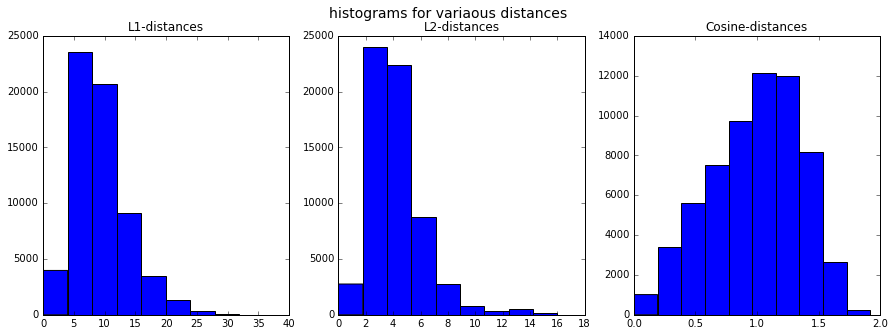

In [54]:

fig = plt.figure(figsize=(15, 5))
fig.suptitle("histograms for variaous distances", fontsize=14)

ax1 = fig.add_subplot(131)
ax1.hist(dataL1[np.triu_indices_from(dataL1,k=1)])
ax1.set_title("L1-distances")


ax2 = fig.add_subplot(132)
ax2.hist(dataL2[np.triu_indices_from(dataL2,k=1)])
ax2.set_title("L2-distances")


ax3 = fig.add_subplot(133)
ax3.hist(dataCosine[np.triu_indices_from(dataCosine,k=1)])
ax3.set_title("Cosine-distances")

plt.show()

### It's time to remember what a clustering algorithm is looking for: to minimize distances within the clusters and to maximize the distances between different clusters.
### Both $L_1$ and $L_2$ seem not to be proper for this purpose: the distances are too grouped, with a very little amout of small distances that we need inside a cluster. The choice remains the cosine. Moreover, taking into account that our data is standardized, it make sense for $-u$ to be the opposite of $u$.

## 3. The clustering itself

In [55]:
from scipy.cluster.hierarchy import dendrogram, linkage


### Traditionally, the numer of clusters should be 3, equal to the number of football roles, but we aim to find out if the computer is able to find different behavior classes, so our choice is for a hierarchical clustering. 
### From the dendrogram:

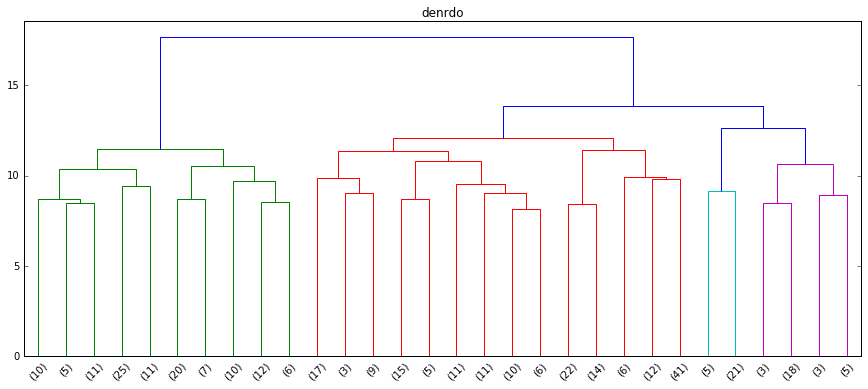

In [56]:
linkage_matrix = linkage(dataCosine, "complete")
plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix,truncate_mode='lastp')
plt.title('denrdo')
plt.show()

### A choice of 3 or 4 clusters would work. We go for the four cluster structure. Moreover, we choose agglomerative clustering, in which small clusters consisting by a single player are initially formed, then merged into bigger and bigger clusters. The complete linkage considers the distance between clusters to be maximum of the distances from all the players in the two clusters.

In [57]:
from sklearn.cluster import AgglomerativeClustering

In [58]:
clusterizare = AgglomerativeClustering(n_clusters=4, affinity='cosine', 
                                       linkage='complete')

In [59]:
y = clusterizare.fit_predict(df1)

In [60]:
df['cluster'] = y

In [61]:
df.head(3)

,Goals,Assists,Minutes,Solo runs into penalty area,Deliveries into penalty area,Total attempts,On target,Red cards,Yellow cards,Fouls committed,Tackles,Blocks,cluster
Name,,,,,,,,,,,,,
Antoine Griezmann,6,2,555,5,11,26,14,0,0,4,5,1,0
Cristiano Ronaldo,3,3,625,4,5,46,12,0,1,8,0,0,0
Olivier Giroud,3,2,456,3,2,15,6,0,1,6,0,0,0


### Notice that the clusters are well balanced:

In [62]:
for i in set(y):
    print 'A proportion of {:.2f} players are in the cluster {:d}'.format(
    float((len(df[df['cluster'] == i]) / float(len(df)))), i)

A proportion of 0.33 players are in the cluster 0
A proportion of 0.32 players are in the cluster 1
A proportion of 0.21 players are in the cluster 2
A proportion of 0.14 players are in the cluster 3


## 4. Visualizing and describing the clusters

### When in doubt about finding two axes for the plot, the two top principal components will always work

In [63]:
from sklearn.decomposition import PCA


In [64]:
pca = PCA(n_components=2)
dfSmall = pd.DataFrame(pca.fit_transform(df1), 
                       index = df1.index, columns = ['firstComp','secondComp'])


In [65]:
dfSmall['cluster'] = y

In [66]:
dfSmall.head()

,firstComp,secondComp,cluster
Name,,,
Antoine Griezmann,5.330951,0.697611,0
Cristiano Ronaldo,4.644956,0.856424,0
Olivier Giroud,2.912013,0.724922,0
Dimitri Payet,5.638030,-1.912259,0
Gareth Bale,4.672945,0.859801,0


In [67]:
from bokeh.charts import Scatter, output_notebook, show 
output_notebook()

Loading BokehJS ...

In [68]:
p = Scatter(dfSmall, x='firstComp', y='secondComp', color='cluster',
            title="Player position", xlabel="first principal component",
            ylabel="second princ component",legend="top_right")

show(p)

### Except for the cluster no2, i.e. the blue cluster, the other three are pretty well defined

In [69]:
df2 = df1.copy()
df2.head()

,Goals,Assists,Solo runs into penalty area,Deliveries into penalty area,Total attempts,On target,Red cards,Yellow cards,Fouls committed,Tackles,Blocks
Name,,,,,,,,,,,
Antoine Griezmann,4.334542,1.349193,0.829062,0.907426,2.235545,3.320213,-0.075378,-0.645252,-0.652384,1.158730,-0.333227
Cristiano Ronaldo,1.692633,1.923765,0.414591,-0.158653,4.078032,2.359938,-0.075378,-0.222420,-0.195612,-0.688291,-0.678728
Olivier Giroud,2.474527,1.724924,0.443018,-0.484618,1.274664,1.396974,-0.075378,-0.065713,-0.166383,-0.688291,-0.678728
Dimitri Payet,2.188794,1.516784,3.165348,4.823774,1.731337,1.504727,-0.075378,-0.645252,-0.918195,-0.283115,-0.678728
Gareth Bale,2.056788,0.519590,1.186188,0.473552,2.239502,4.084186,-0.075378,-0.149436,-0.474858,0.465664,-0.318966


### But do, somehow, these clusters represent the traditional roles in a football team? Let's do a second scatterplot, this time with respect to the offensive and defensive attitude. We can extract thevalues for both these measures by summing speciffic columns:

In [70]:
df2['offensive'] = df2['Goals'] + df2['Solo runs into penalty area'] + df2['Total attempts']
df2['defensive'] = df2['Tackles'] + df2['Blocks']
df2['cluster'] = y

In [71]:
df2 = df2[['offensive', 'defensive', 'cluster']]

In [72]:
p1 = Scatter(df2, x='offensive', y='defensive', color='cluster',
            title="Player attitude", xlabel="offensive attitude",
            ylabel="defensive attitude",legend="top_right")

show(p1)

### It seems that the red cluster lacks deensive attitude, while the green one, lacks offensive attitude. Things will become pretty clear when calculating the cluster centroinds as averages:

In [73]:
df1['Cluster'] = y
df1.head(3)

,Goals,Assists,Solo runs into penalty area,Deliveries into penalty area,Total attempts,On target,Red cards,Yellow cards,Fouls committed,Tackles,Blocks,Cluster
Name,,,,,,,,,,,,
Antoine Griezmann,4.334542,1.349193,0.829062,0.907426,2.235545,3.320213,-0.075378,-0.645252,-0.652384,1.158730,-0.333227,0
Cristiano Ronaldo,1.692633,1.923765,0.414591,-0.158653,4.078032,2.359938,-0.075378,-0.222420,-0.195612,-0.688291,-0.678728,0
Olivier Giroud,2.474527,1.724924,0.443018,-0.484618,1.274664,1.396974,-0.075378,-0.065713,-0.166383,-0.688291,-0.678728,0


In [74]:
framelist = []
for cl in set(y):
    frame = df1[df1['Cluster'] == cl]
    name = str(cl)
    data = frame.mean(axis=0).to_frame(name=name)
    framelist.append(data)
    

In [75]:
centroidsDf = pd.concat(framelist,axis=1)

In [76]:
centroidsDf

,0,1,2,3
Goals,0.753128,-0.362210,-0.355917,-0.417093
Assists,0.395850,-0.334341,0.109811,-0.342082
Solo runs into penalty area,0.581985,-0.447813,0.069149,-0.462467
Deliveries into penalty area,0.631561,-0.376981,-0.127531,-0.442118
Total attempts,0.910037,-0.513629,-0.529223,-0.185125
On target,0.879822,-0.476286,-0.546234,-0.172550
Red cards,-0.075378,-0.075378,-0.075378,0.458297
Yellow cards,-0.245679,-0.256392,-0.106207,1.308516
Fouls committed,-0.153558,-0.425222,0.054973,1.229361
Tackles,-0.089131,-0.299624,0.850994,-0.396767


### The cluser 0 is for gloal oriented players, largely overlapping the attacking role. The clusster 1 has a value that is greater than average only for blocks, they surely are the defenders. The cluster 2 consists of players with some assists, some tackles; they are more or less the midfielders. And finally, the misterious fourth role in a team is revealed: the bone braker, the only one with above average number of fouls, yellow and red cards and everything else, below average. Good to have in a team, it seems.

Any comment is welcome: cvasii23 at gmail dot com